In [323]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [324]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [303]:
s3m = pd.read_hdf("../catalogues/s3m.h5")

In [307]:
len(s3m.q) / 1e7

1.4389808

In [308]:
s3m_a = s3m.q.values / (1 - s3m.e.values)

In [60]:
# read in mpcorb data and get (a, e, i)
mpcorb = pd.read_hdf("../catalogues/mpcorb.h5")
mpc_aei = np.array([mpcorb.a, mpcorb.e, mpcorb.i]).T

In [326]:
densities = np.load("new_densities.npy")

In [325]:
a = np.logspace(-0.5, 2.0, 1000)
ecc = np.linspace(0, 1, 1001)
inc = np.linspace(0, 180, 1002)

grid_shape = (len(a), len(ecc), len(inc))

In [327]:
xlims = (0.3, 105)

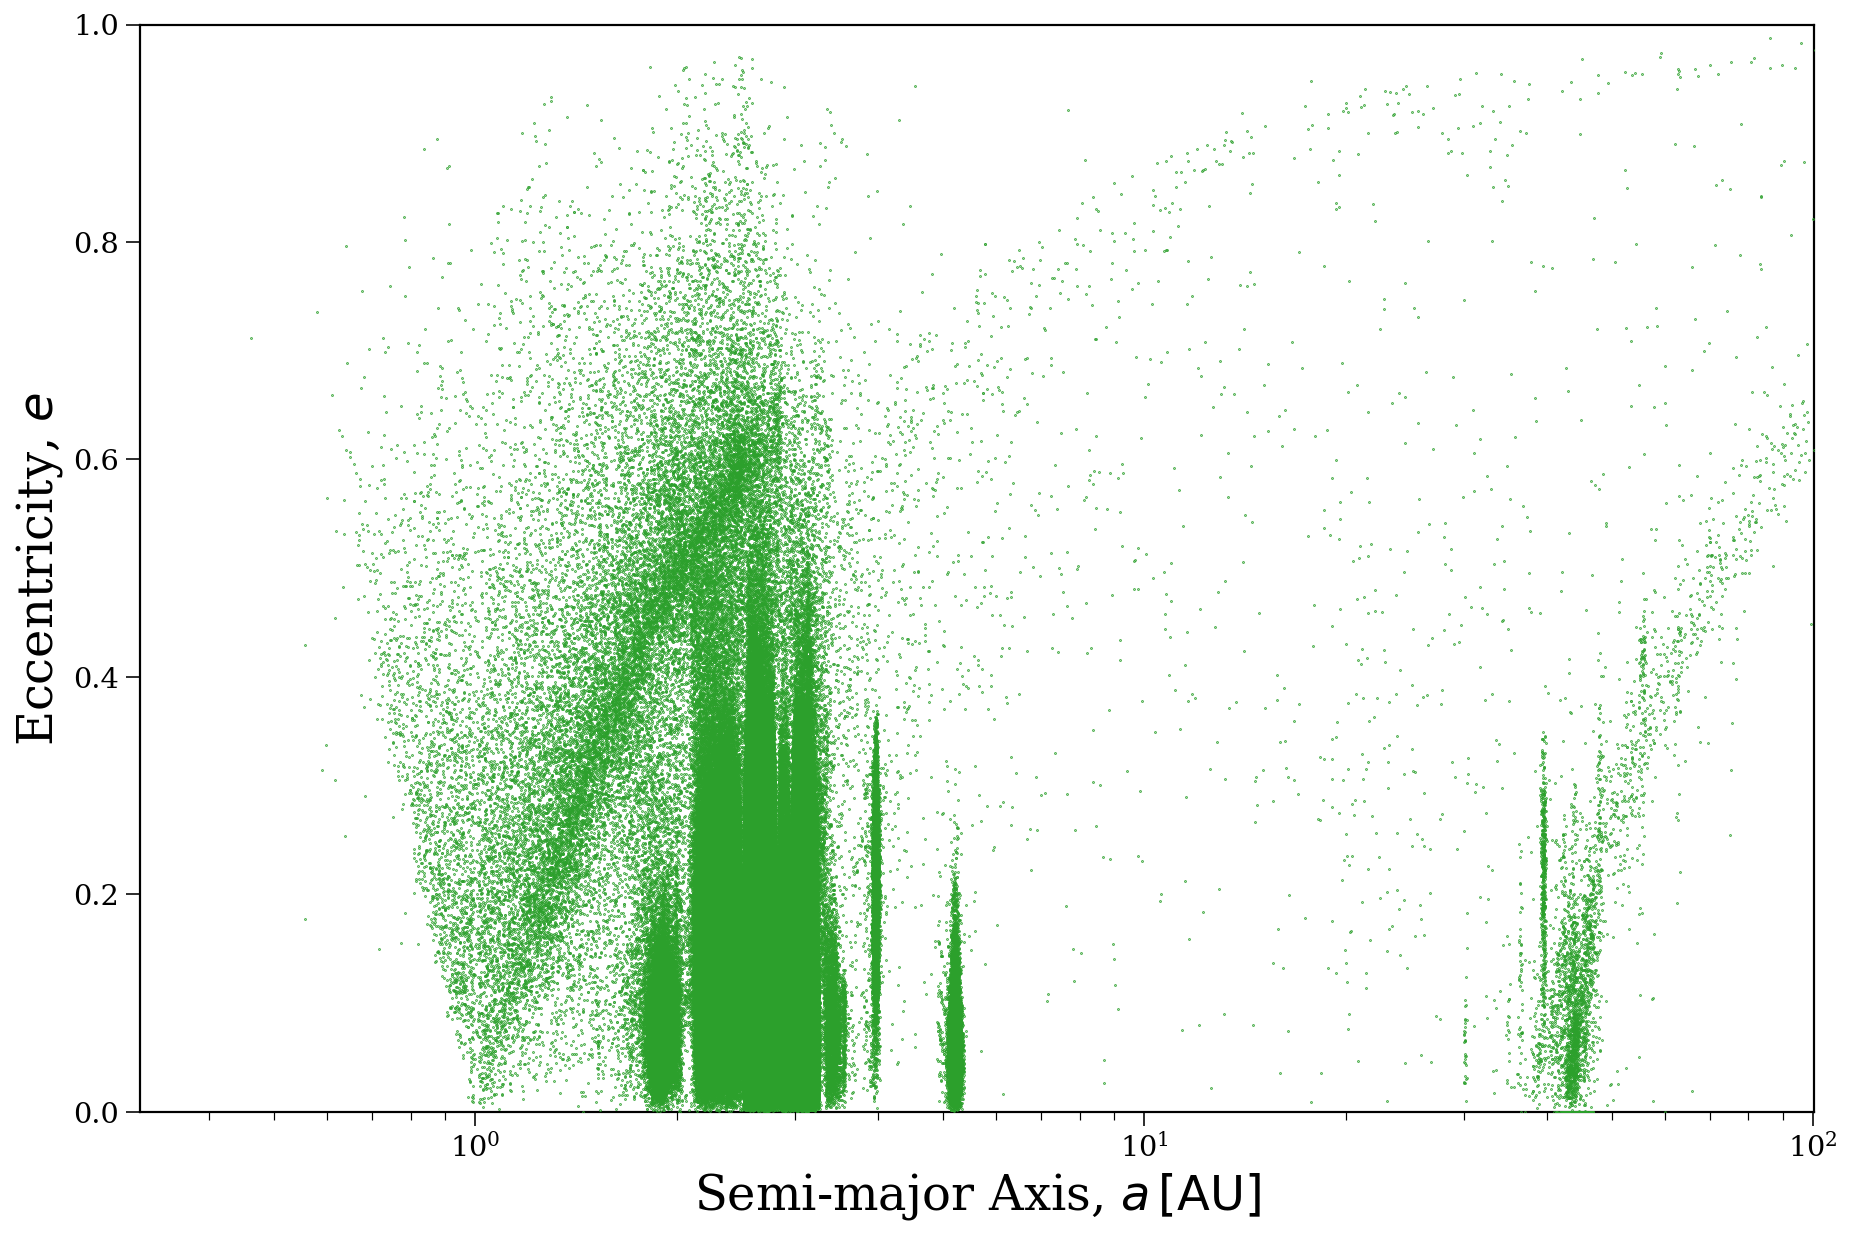

In [353]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xscale("log")

ax.scatter(mpcorb.a, mpcorb.e, marker=".", s=0.5, zorder=100, color="tab:green")

ax.set_xlim(xlims)
ax.set_ylim(0, 1)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Eccentricity, $e$")

plt.show()

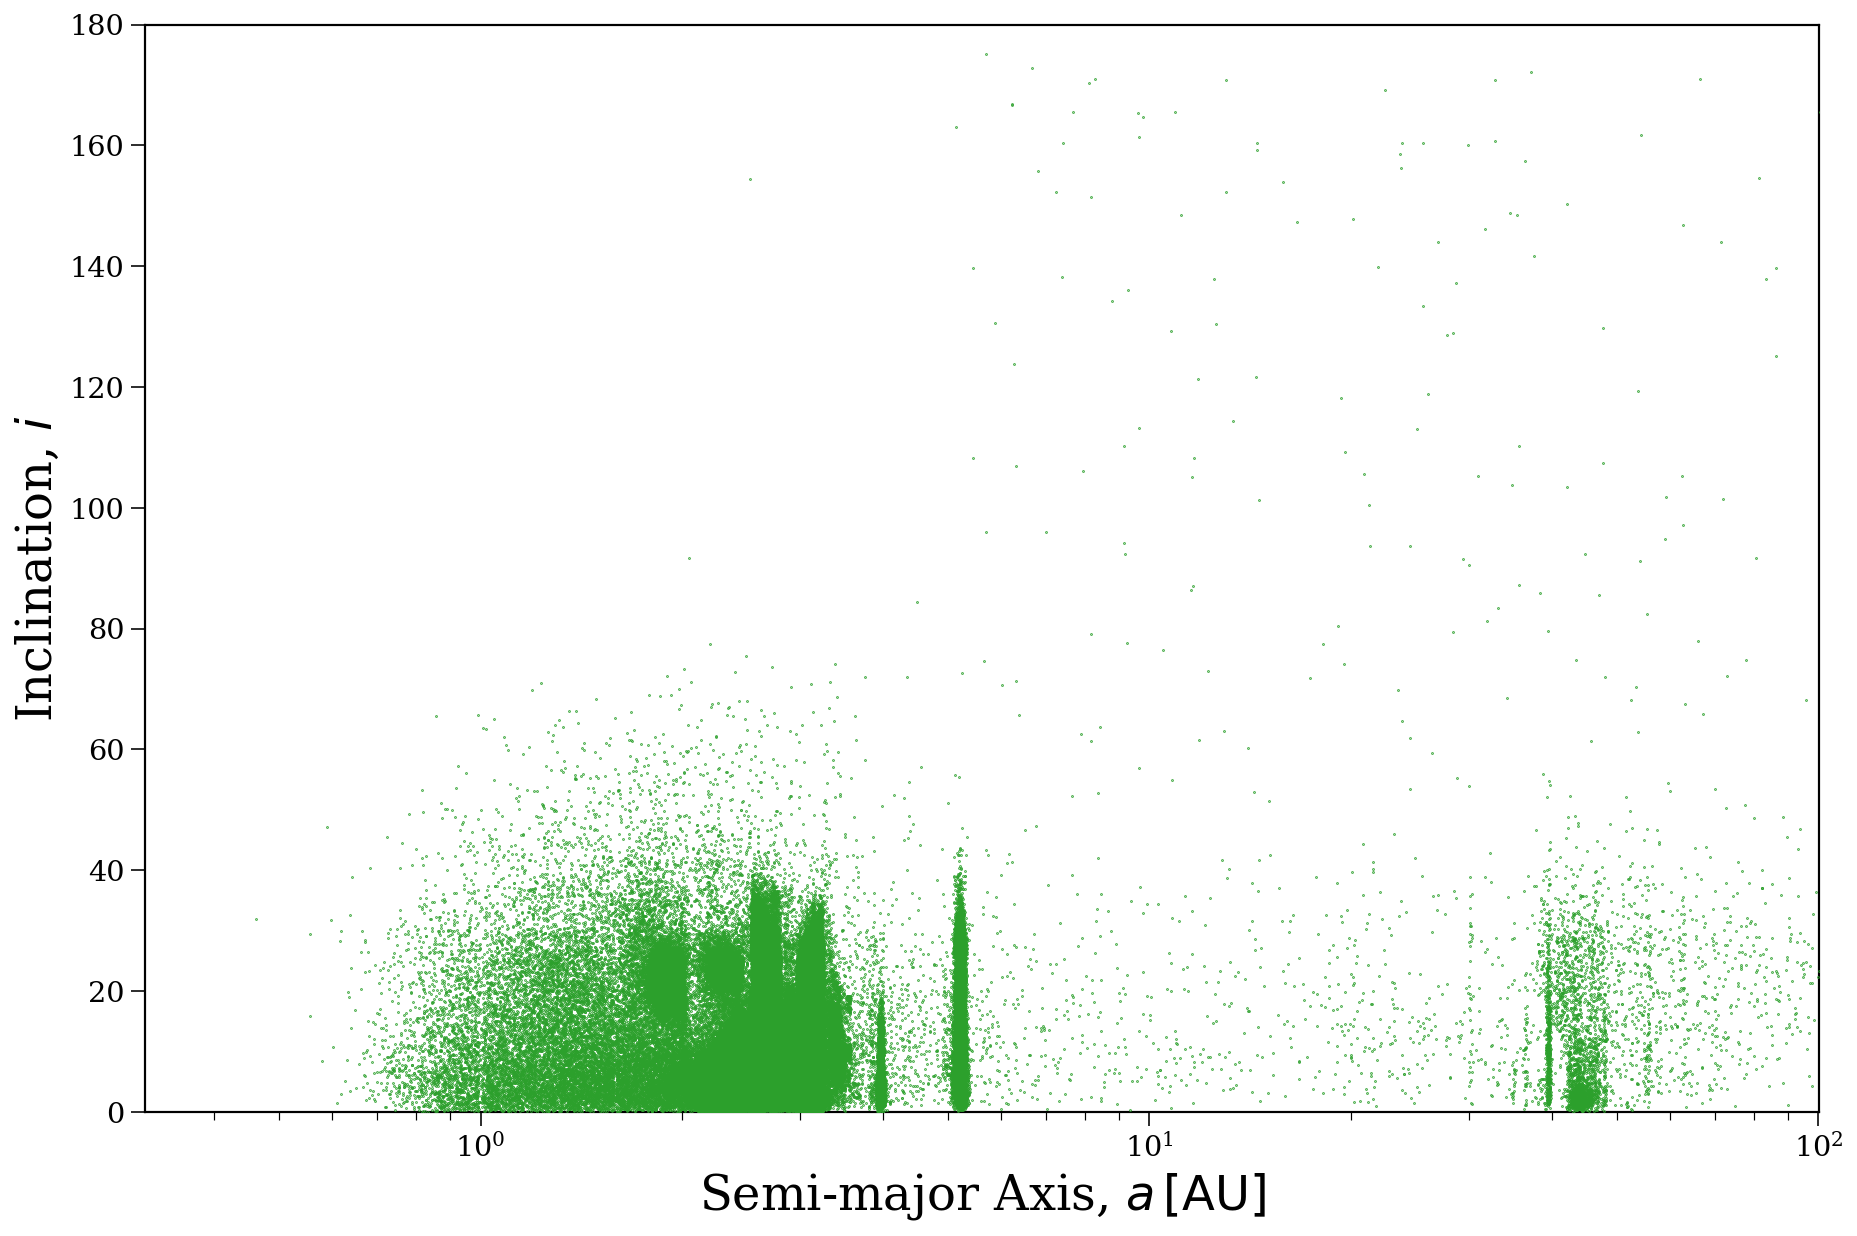

In [356]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xscale("log")

ax.scatter(mpcorb.a, mpcorb.i, marker=".", s=0.5, zorder=100, color="tab:green")

ax.set_xlim(xlims)
ax.set_ylim(0, 180)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Inclination, $i$")

plt.show()

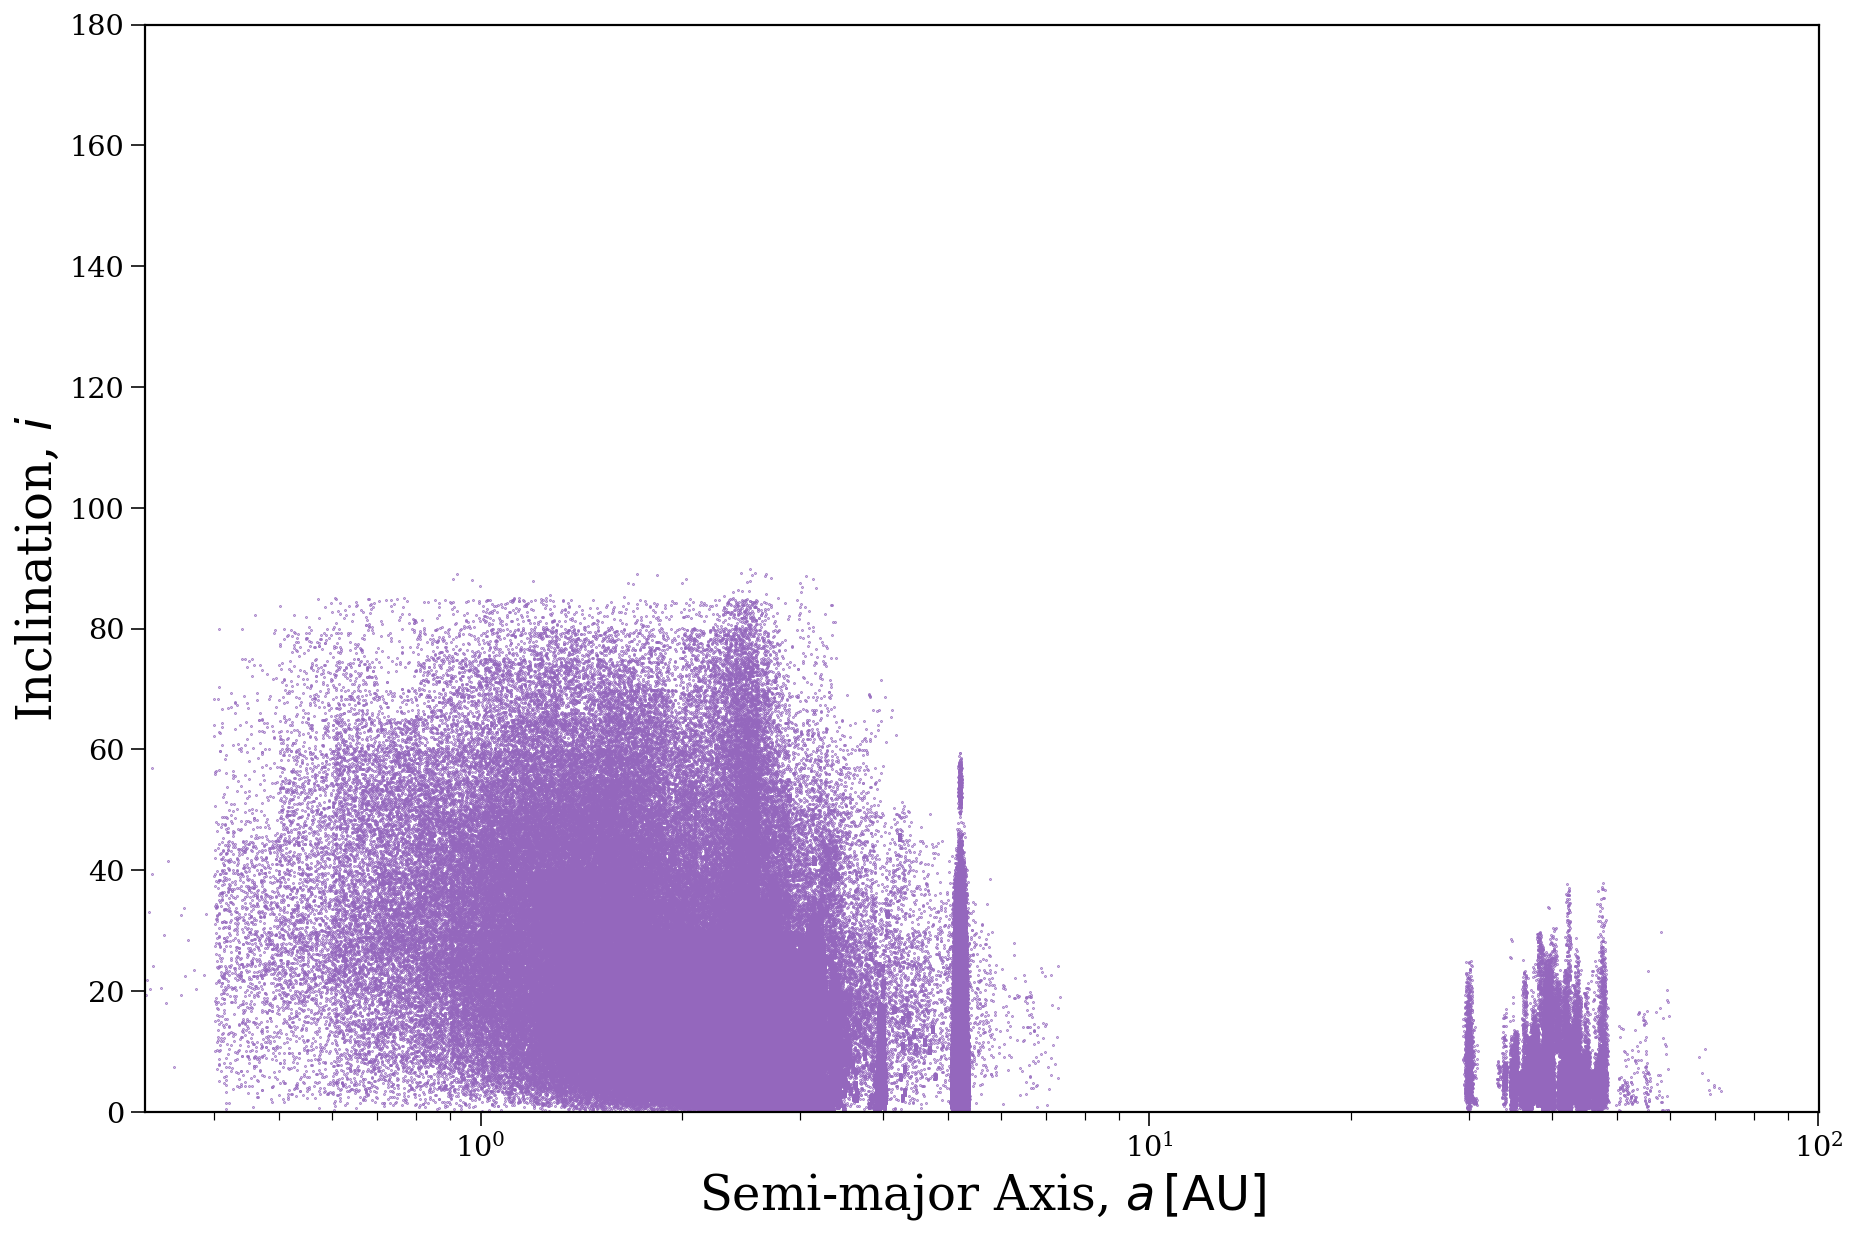

In [354]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xscale("log")

ax.scatter(s3m_a, s3m.i.values, marker=".", s=0.5, color="tab:purple")
ax.set_xlim(xlims)
ax.set_ylim(0, 180)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Inclination, $i$")

plt.show()

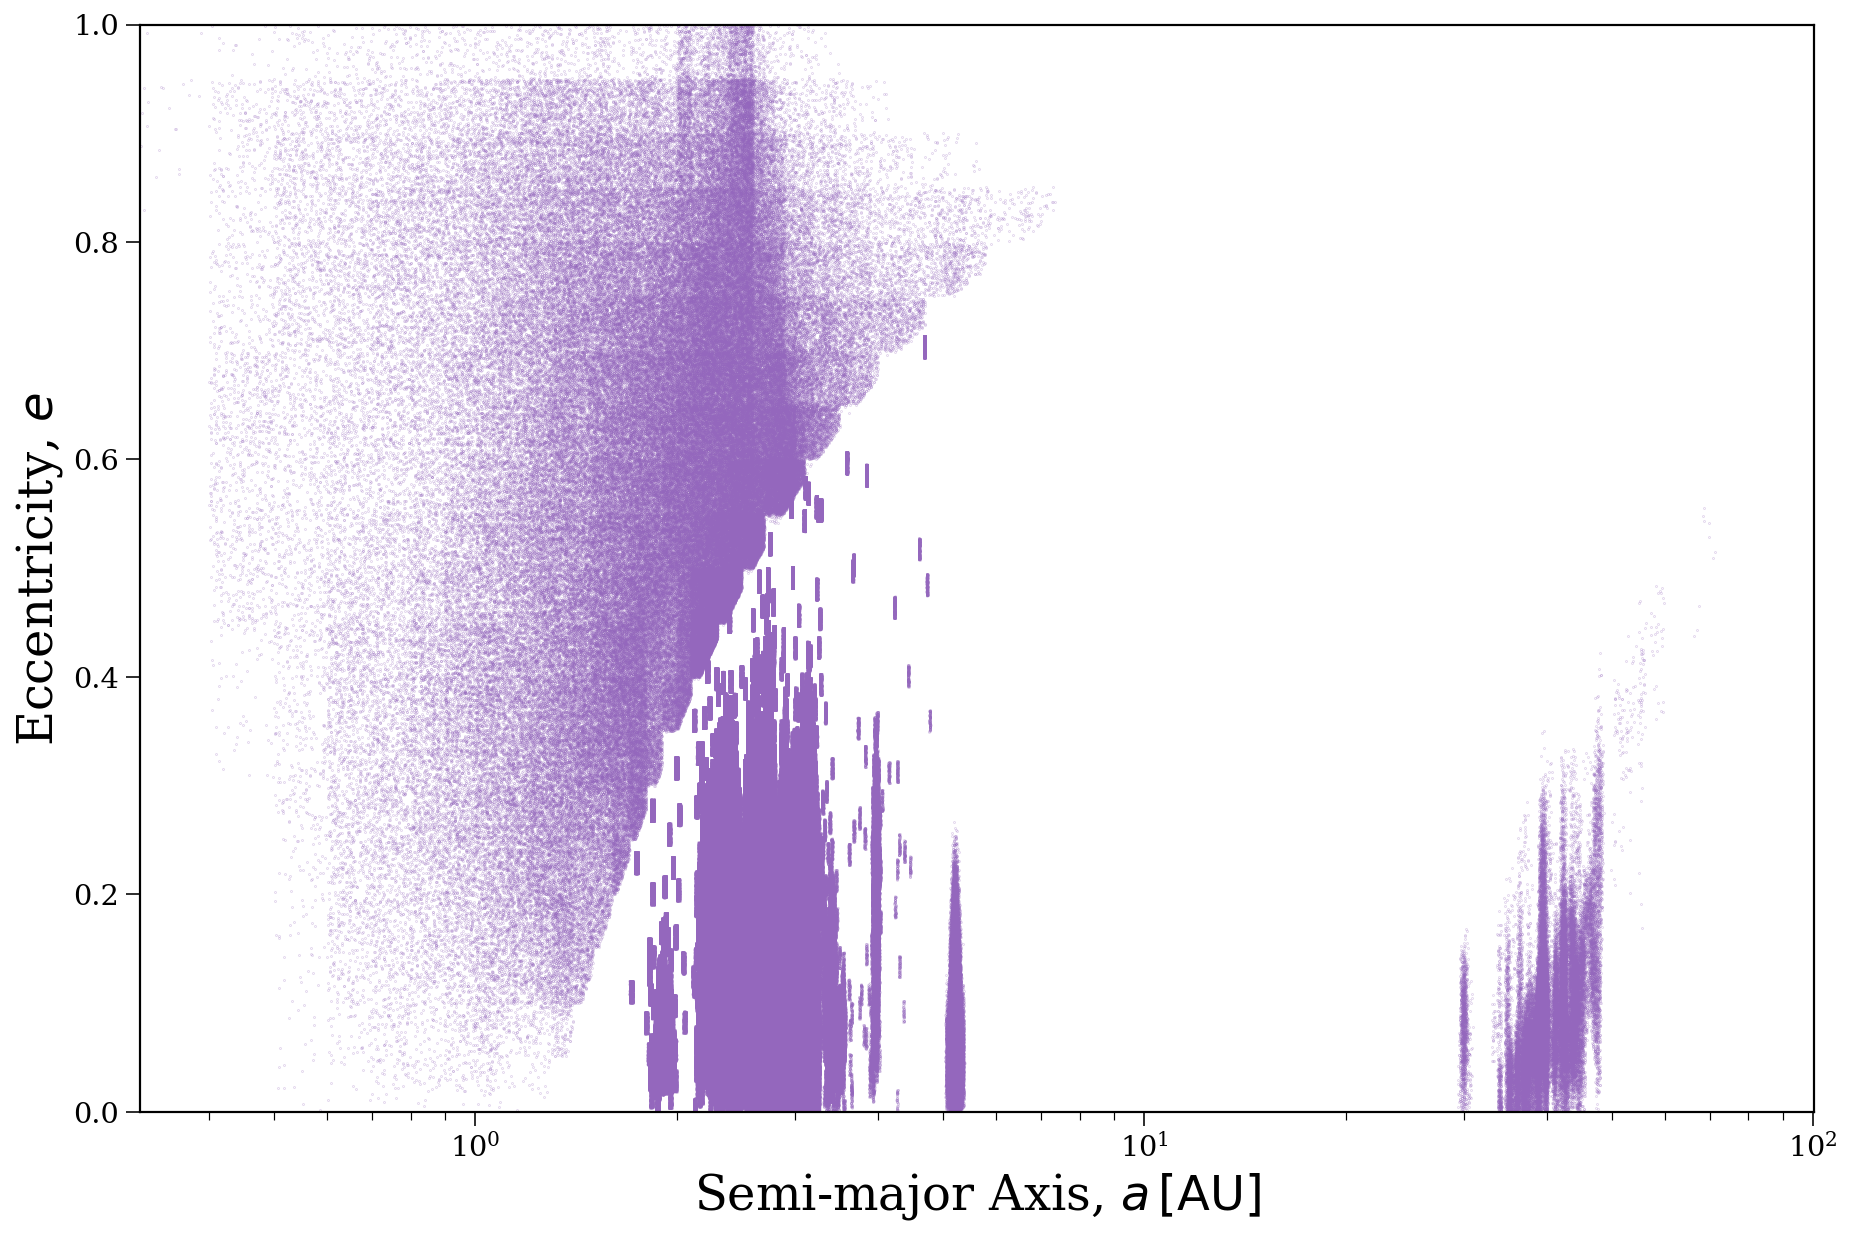

In [533]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xscale("log")

ax.scatter(s3m_a, s3m.e.values, marker=".", s=0.05, color="tab:purple")
ax.set_xlim(xlims)
ax.set_ylim(0, 1)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Eccentricity, $e$")

plt.show()

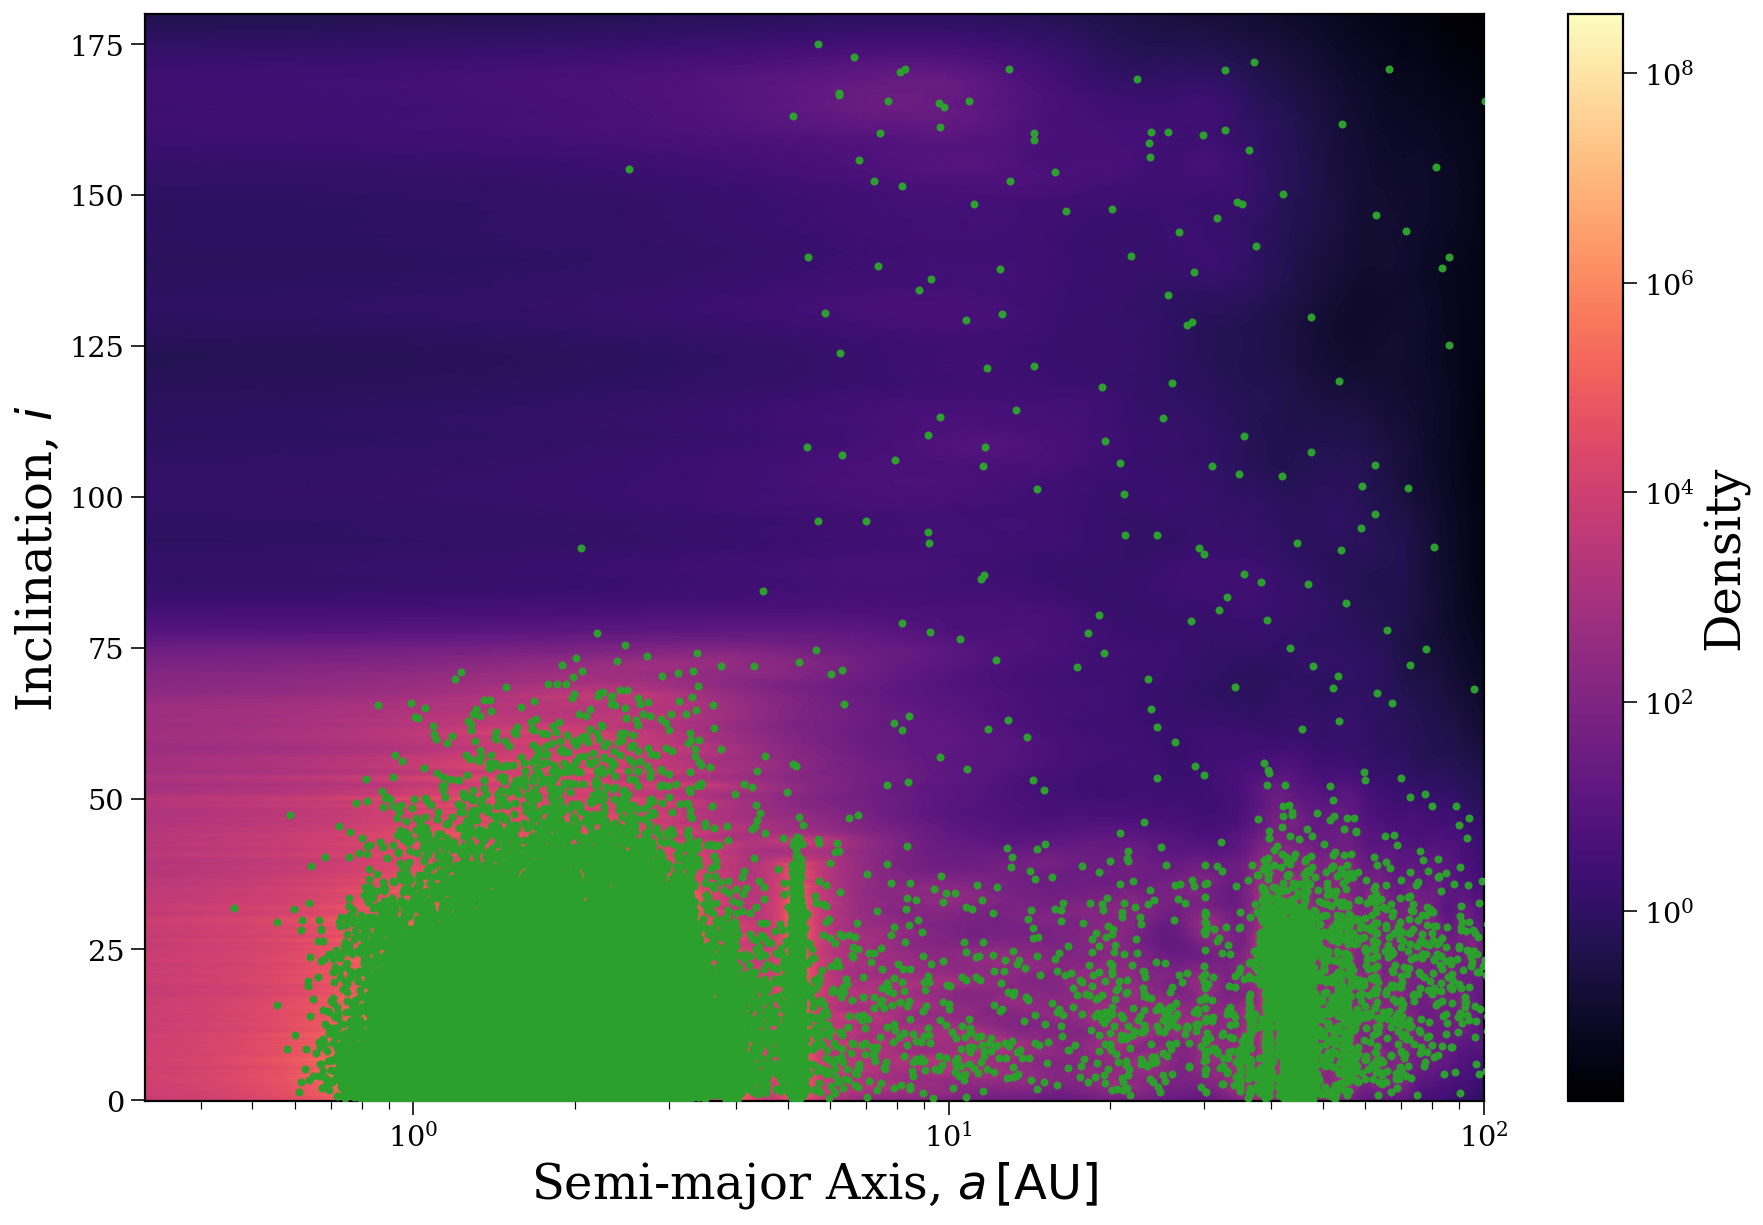

In [329]:
X, Y = np.meshgrid(a, inc)
img = densities.reshape(grid_shape).sum(axis=1).T

fig, ax = plt.subplots(figsize=(15, 10))

mesh = ax.pcolormesh(X, Y, img, shading="nearest", norm=LogNorm(), cmap="magma")
cbar = fig.colorbar(mesh, label="Density")

ax.set_xscale("log")

xlims = ax.get_xlim()
ax.scatter(mpcorb.a, mpcorb.i, marker=".", zorder=100, color="tab:green")
ax.set_xlim(xlims)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Inclination, $i$")

plt.show()

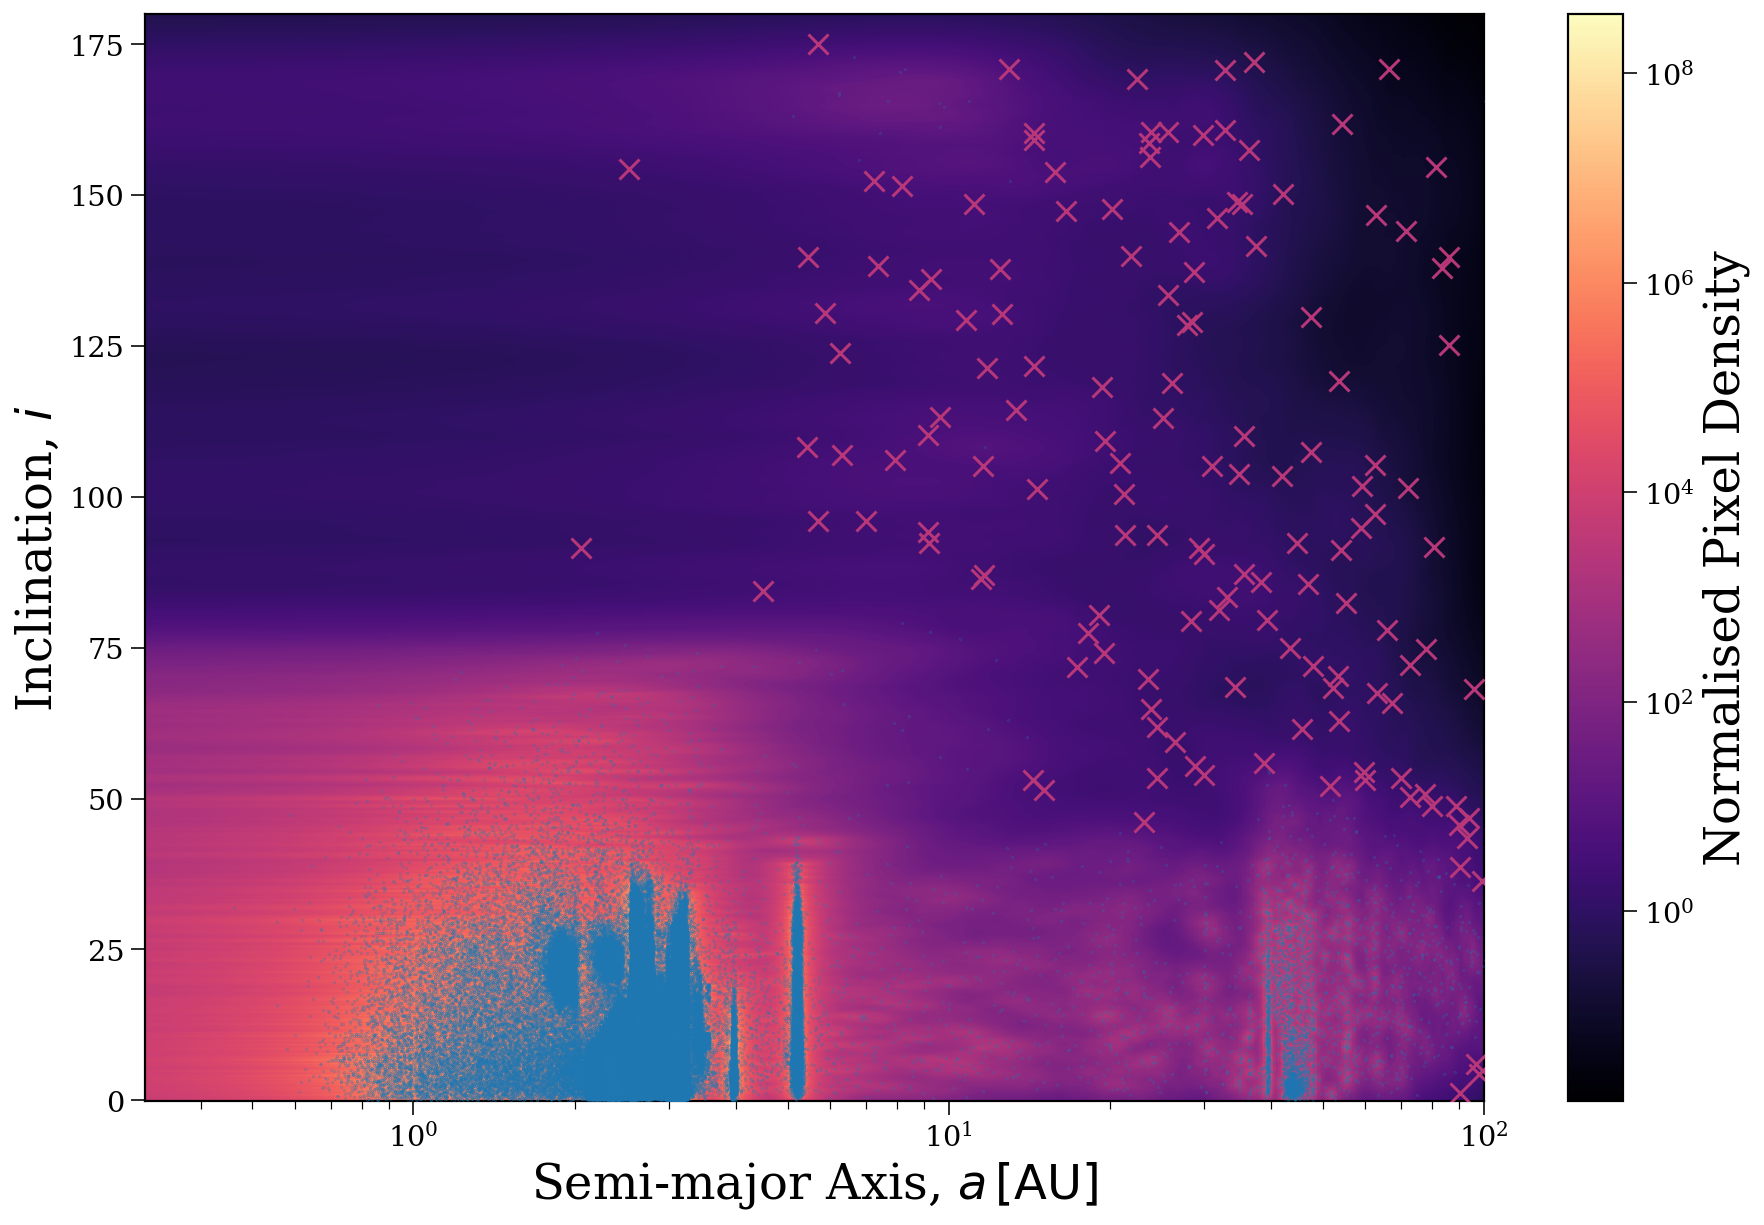

In [532]:
X, Y = np.meshgrid(a, inc)
img = densities.reshape(grid_shape).sum(axis=1).T

x_pixel = np.searchsorted(a, mpcorb.a)
y_pixel = np.searchsorted(inc, mpcorb.i)

scatter_pixels = x_pixel * inc.shape + y_pixel

low_coords = np.argwhere(img.T < 5e0)
low_pixels = low_coords[:, 0] * inc.shape + low_coords[:, 1]

mask = np.isin(scatter_pixels, low_pixels)

fig, ax = plt.subplots(figsize=(15, 10))

mesh = ax.pcolormesh(X, Y, img, shading="nearest", norm=LogNorm(), cmap="magma")
cbar = fig.colorbar(mesh, label="Normalised Pixel Density")

# mesh = ax.pcolormesh(X, Y, np.zeros_like(X), shading="nearest", color="white")

ax.set_xscale("log")

xlims = ax.get_xlim()
ax.scatter(mpcorb.a, mpcorb.i, marker=".", zorder=100, s=0.1)
ax.scatter(mpcorb.a[mask], mpcorb.i[mask], marker="x", color=plt.get_cmap("magma")(0.5), zorder=100, s=100)
ax.set_xlim(xlims)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Inclination, $i$")

plt.show()

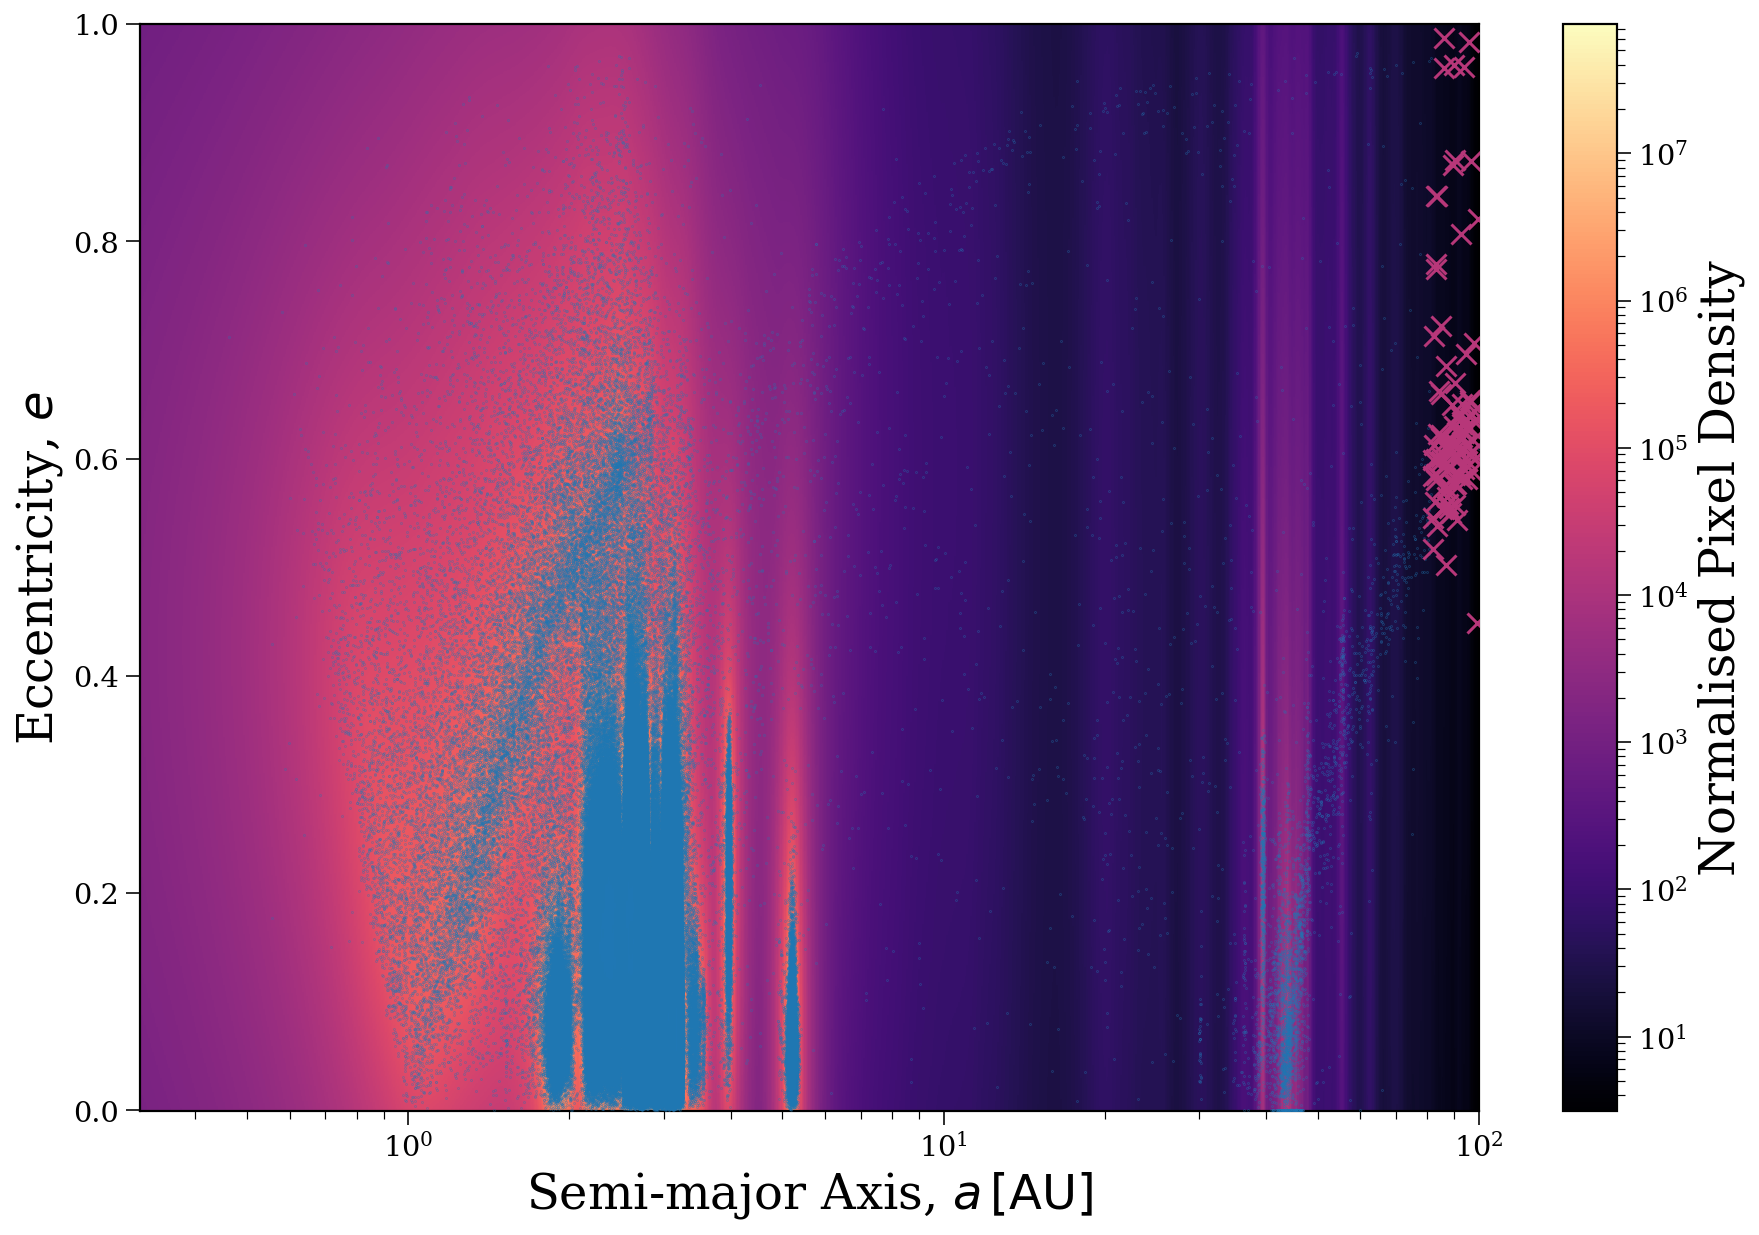

In [365]:
X, Y = np.meshgrid(a, ecc)
img = densities.reshape(grid_shape).sum(axis=2).T

x_pixel = np.searchsorted(a, mpcorb.a)
y_pixel = np.searchsorted(inc, mpcorb.e)

scatter_pixels = x_pixel * ecc.shape + y_pixel

low_coords = np.argwhere(img.T < 1e1)
low_pixels = low_coords[:, 0] * ecc.shape + low_coords[:, 1]

mask = np.isin(scatter_pixels, low_pixels)

fig, ax = plt.subplots(figsize=(15, 10))

mesh = ax.pcolormesh(X, Y, img, shading="nearest", norm=LogNorm(), cmap="magma")
cbar = fig.colorbar(mesh, label="Normalised Pixel Density")

ax.set_xscale("log")

xlims = ax.get_xlim()
ax.scatter(mpcorb.a, mpcorb.e, marker=".", zorder=100, s=0.1)
ax.scatter(mpcorb.a[mask], mpcorb.e[mask], marker="x", color=plt.get_cmap("magma")(0.5), zorder=100, s=100)
ax.set_xlim(xlims)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Eccentricity, $e$")

plt.show()

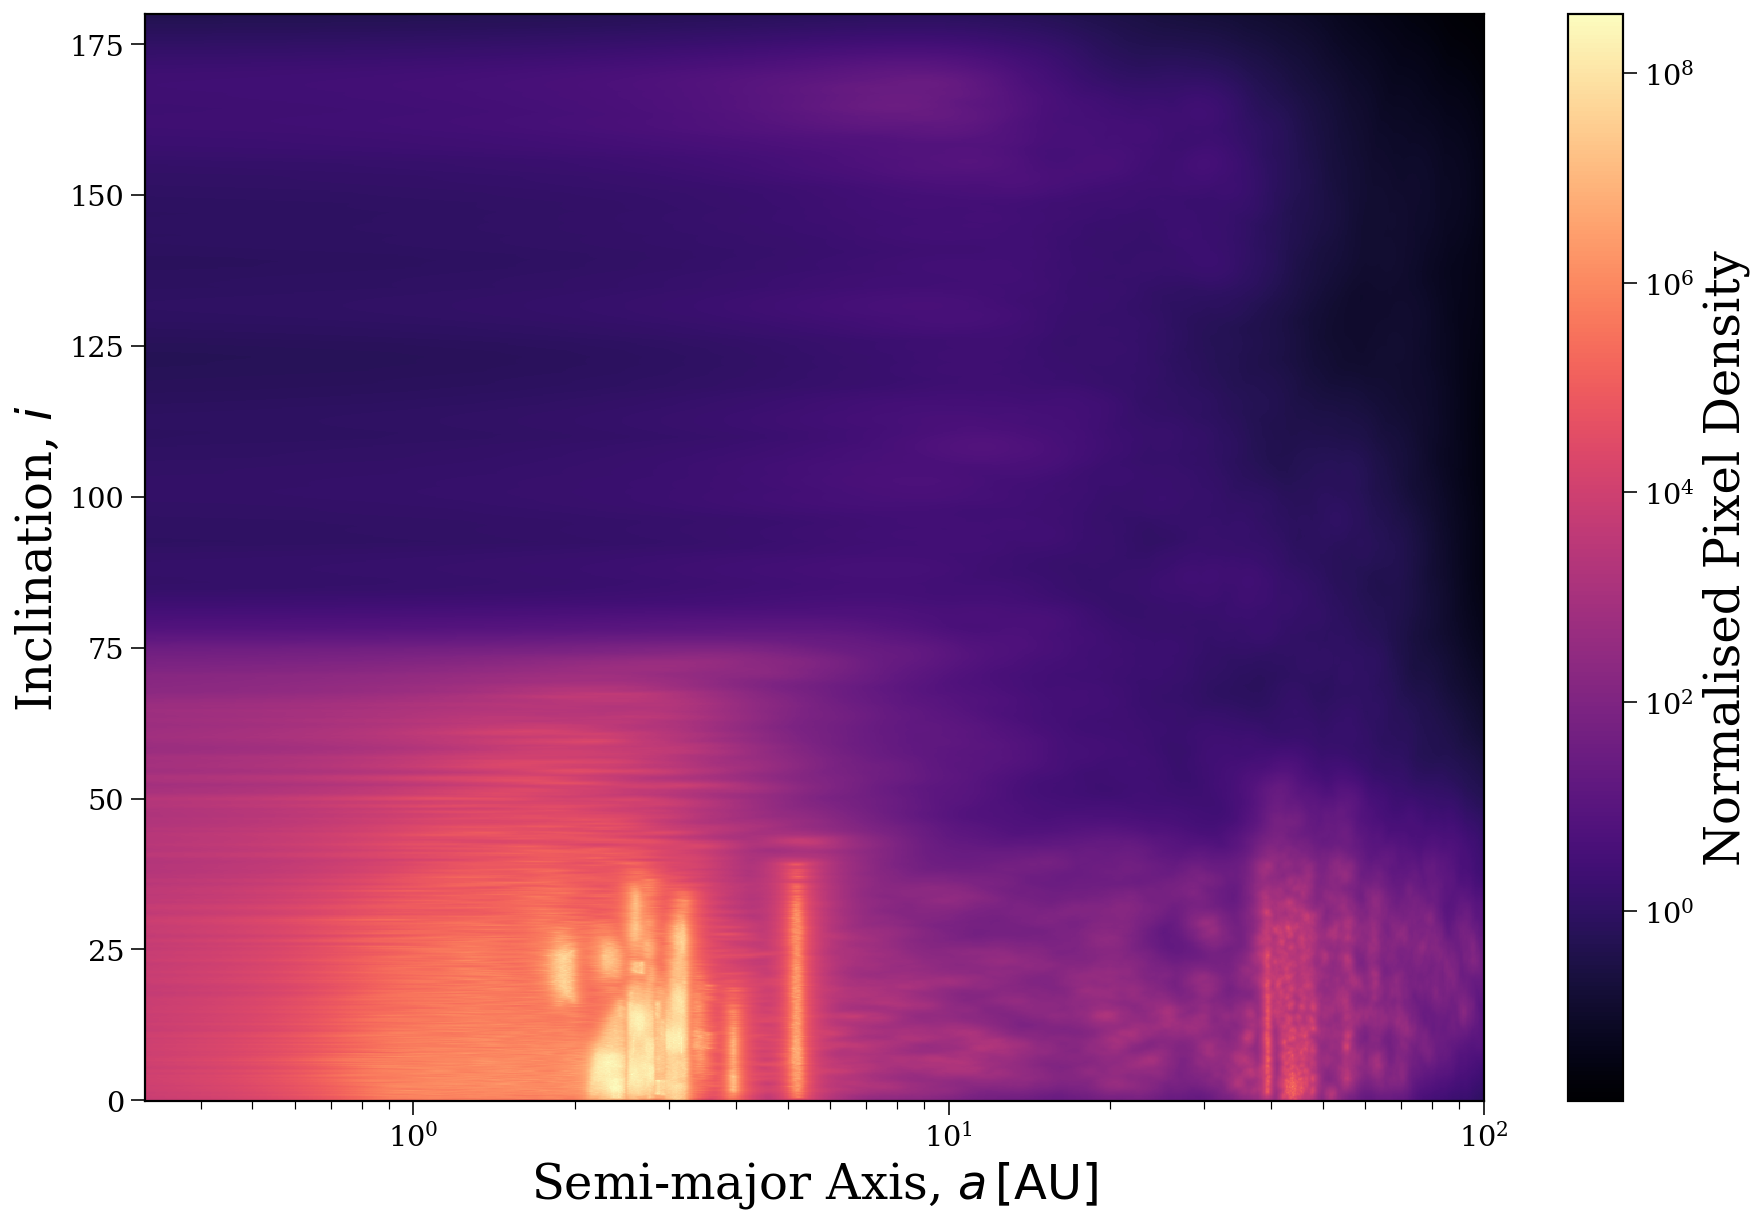

In [337]:
X, Y = np.meshgrid(a, inc)
img = densities.reshape(grid_shape).sum(axis=1).T

fig, ax = plt.subplots(figsize=(15, 10))

mesh = ax.pcolormesh(X, Y, img, shading="nearest", norm=LogNorm(), cmap="magma")
cbar = fig.colorbar(mesh, label="Normalised Pixel Density")

ax.set_xscale("log")

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Inclination, $i$")

plt.show()

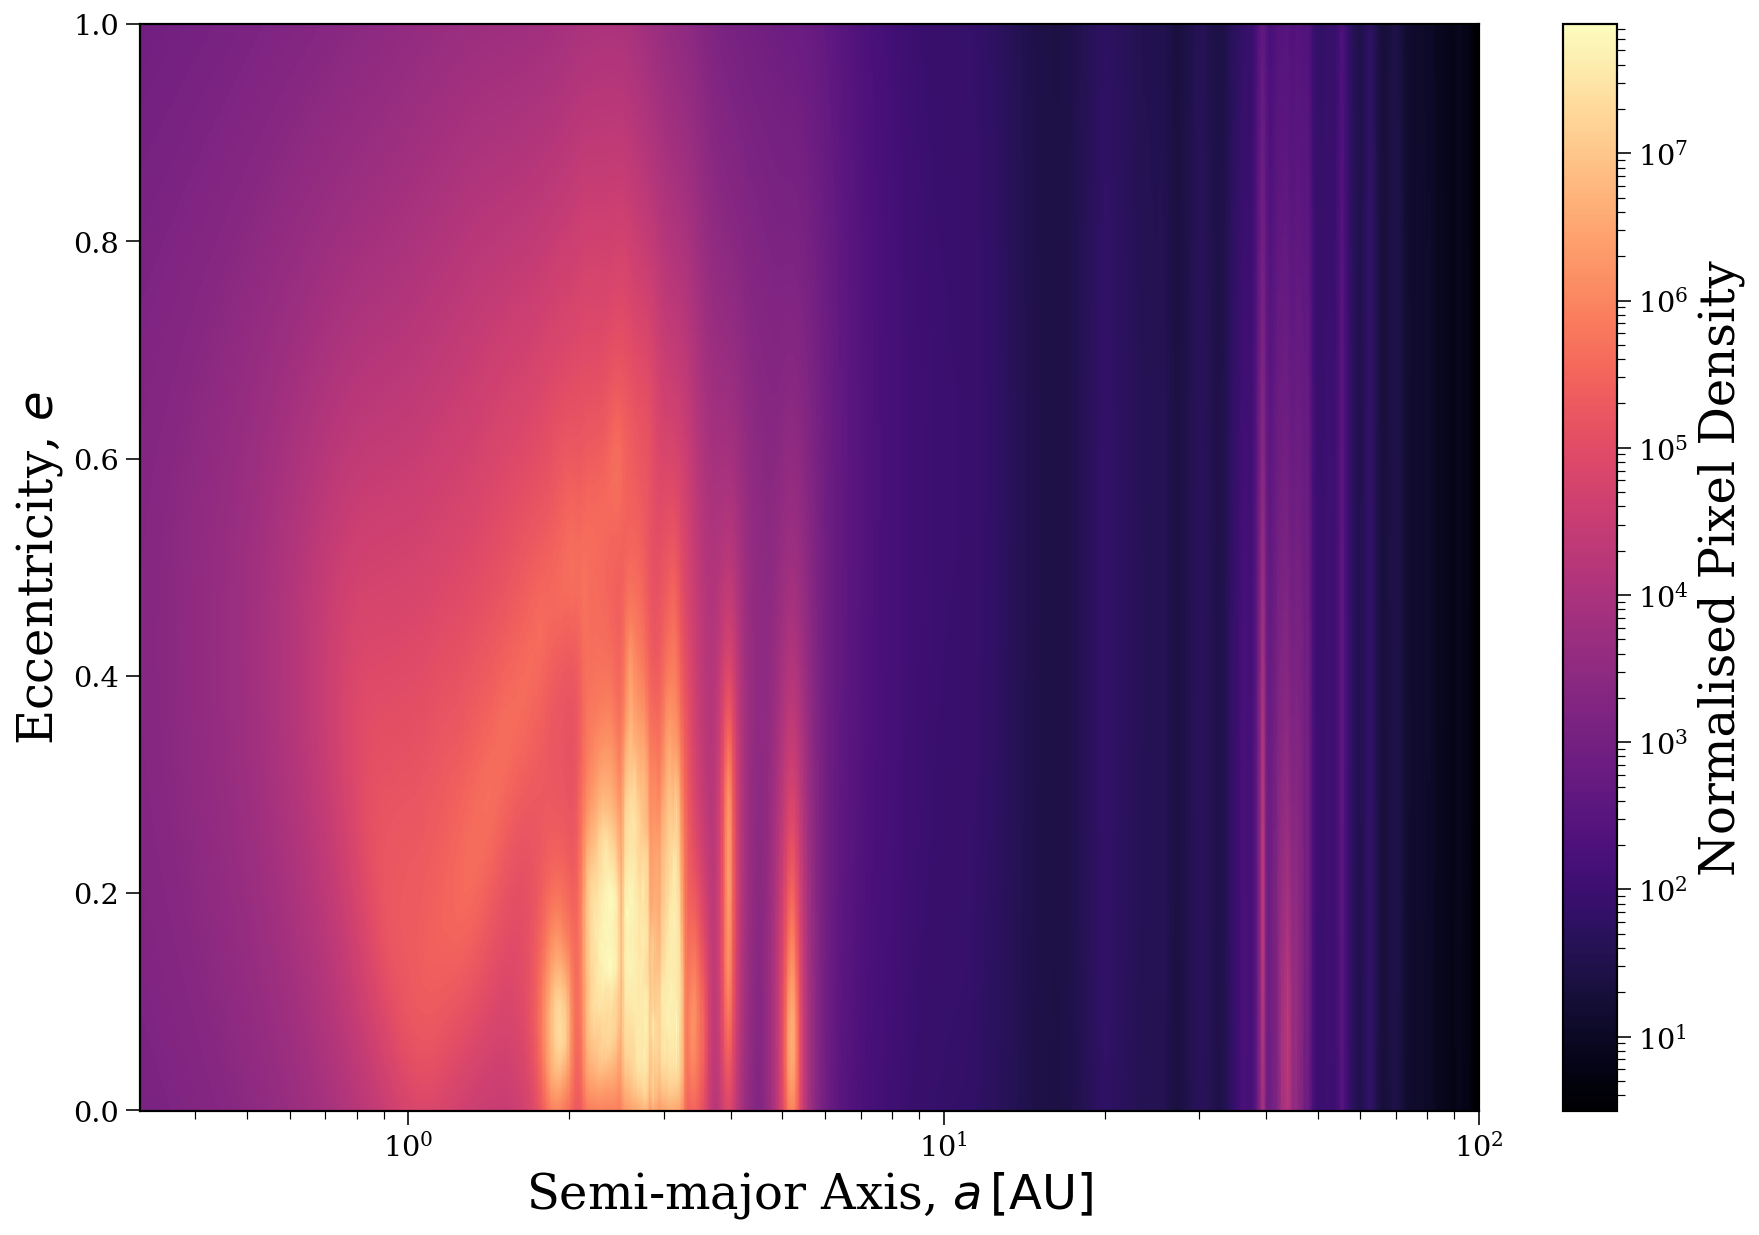

In [359]:
X, Y = np.meshgrid(a, ecc)
img = densities.reshape(grid_shape).sum(axis=2).T

fig, ax = plt.subplots(figsize=(15, 10))

mesh = ax.pcolormesh(X, Y, img, shading="nearest", norm=LogNorm(), cmap="magma")
cbar = fig.colorbar(mesh, label="Normalised Pixel Density")

ax.set_xscale("log")

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Eccentricity, $e$")

plt.show()

# KDE explained

In [367]:
from scipy.stats import gaussian_kde

In [386]:
class MirroredKDE(gaussian_kde):
    """ KDE class that mirrors data at boundaries to account for bounded support """

    def __init__(self, data, weights=None, lower_bound=None, upper_bound=None,
                 bw_method=None, bw_adjust=None):
        """ instantiate class in similar way to scipy but with some additions """
        super().__init__(data, weights=weights, bw_method=bw_method)

        # also store the lower and upper bounds
        self._lower_bound = lower_bound
        self._upper_bound = upper_bound

        # allow adjustment of the default bandwidth similar to seaborn
        if bw_adjust is not None:
            self.set_bandwidth(self.factor * bw_adjust)

    def evaluate(self, x_vals=None, x_min=None, x_max=None, x_count=200):
        """ evaluate the kde taking into account the boundaries """

        # only return x_vals when they aren't supplied
        return_x_vals = x_vals is None

        if x_vals is None:
            if x_min is None:
                x_min = np.min(self.dataset)
            if x_max is None:
                x_max = np.max(self.dataset)
            x_vals = np.linspace(x_min, x_max, x_count)

        # make a copy of the data before I mirror anything
        unmirrored_x_vals = np.copy(x_vals)

        # evaluate the kde at the original x values
        kde_vals = super().evaluate(x_vals)

        # if either bound is present then mirror the data and
        # add the evaluated kde for the mirrored data to the original
        if self._lower_bound is not None:
            x_vals = 2.0 * self._lower_bound - x_vals
            kde_vals += super().evaluate(x_vals)
            x_vals = unmirrored_x_vals

        if self._upper_bound is not None:
            x_vals = 2.0 * self._upper_bound - x_vals
            kde_vals += super().evaluate(x_vals)
            x_vals = unmirrored_x_vals

        if return_x_vals:
            return x_vals, kde_vals
        else:
            return kde_vals

In [432]:
data = np.concatenate([np.random.normal(loc=-1, scale=0.5, size=10), np.random.normal(loc=1, scale=0.2, size=10)])
kde = MirroredKDE(data, bw_adjust=0.4)

In [435]:
from scipy.stats import norm

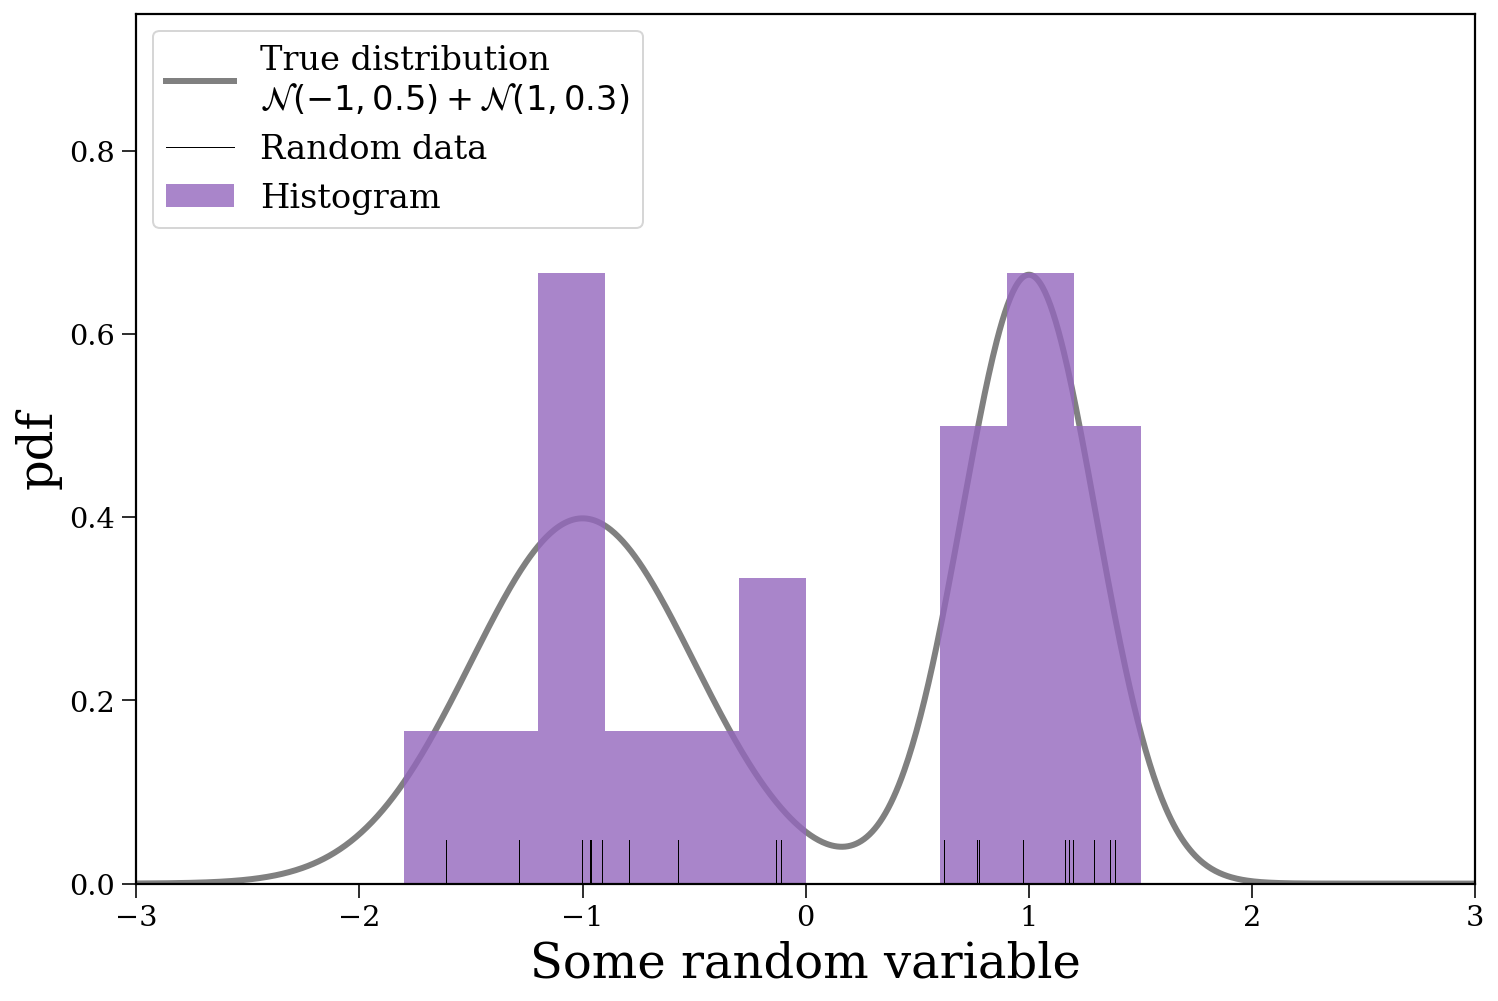

In [529]:
x_range = np.linspace(-3, 3, 1000)

fig, ax = plt.subplots()

ax.plot(x_range, 0.5 * (norm(loc=-1, scale=0.5).pdf(x_range) + norm(loc=1, scale=0.3).pdf(x_range)),
        label="True distribution\n" + r"$\mathcal{N}(-1, 0.5) + \mathcal{N}(1, 0.3)$",
        lw=3, color="grey", zorder=-1)

for i, datum in enumerate(data):
    plt.axvline(datum, -0.05, 0.05, zorder=10, color="black", lw=0.5, label="Random data" if i == 0 else "")

ax.hist(data, bins=np.arange(-3, 3, 0.3), density=True, color="tab:purple", alpha=0.8, label="Histogram")
    
ax.set_xlim(-3, 3)
ax.set_xlabel("Some random variable")
ax.set_ylabel("pdf")

ax.set_ylim(0, 0.95)

ax.legend(fontsize=0.7*fs, loc="upper left")

plt.show()

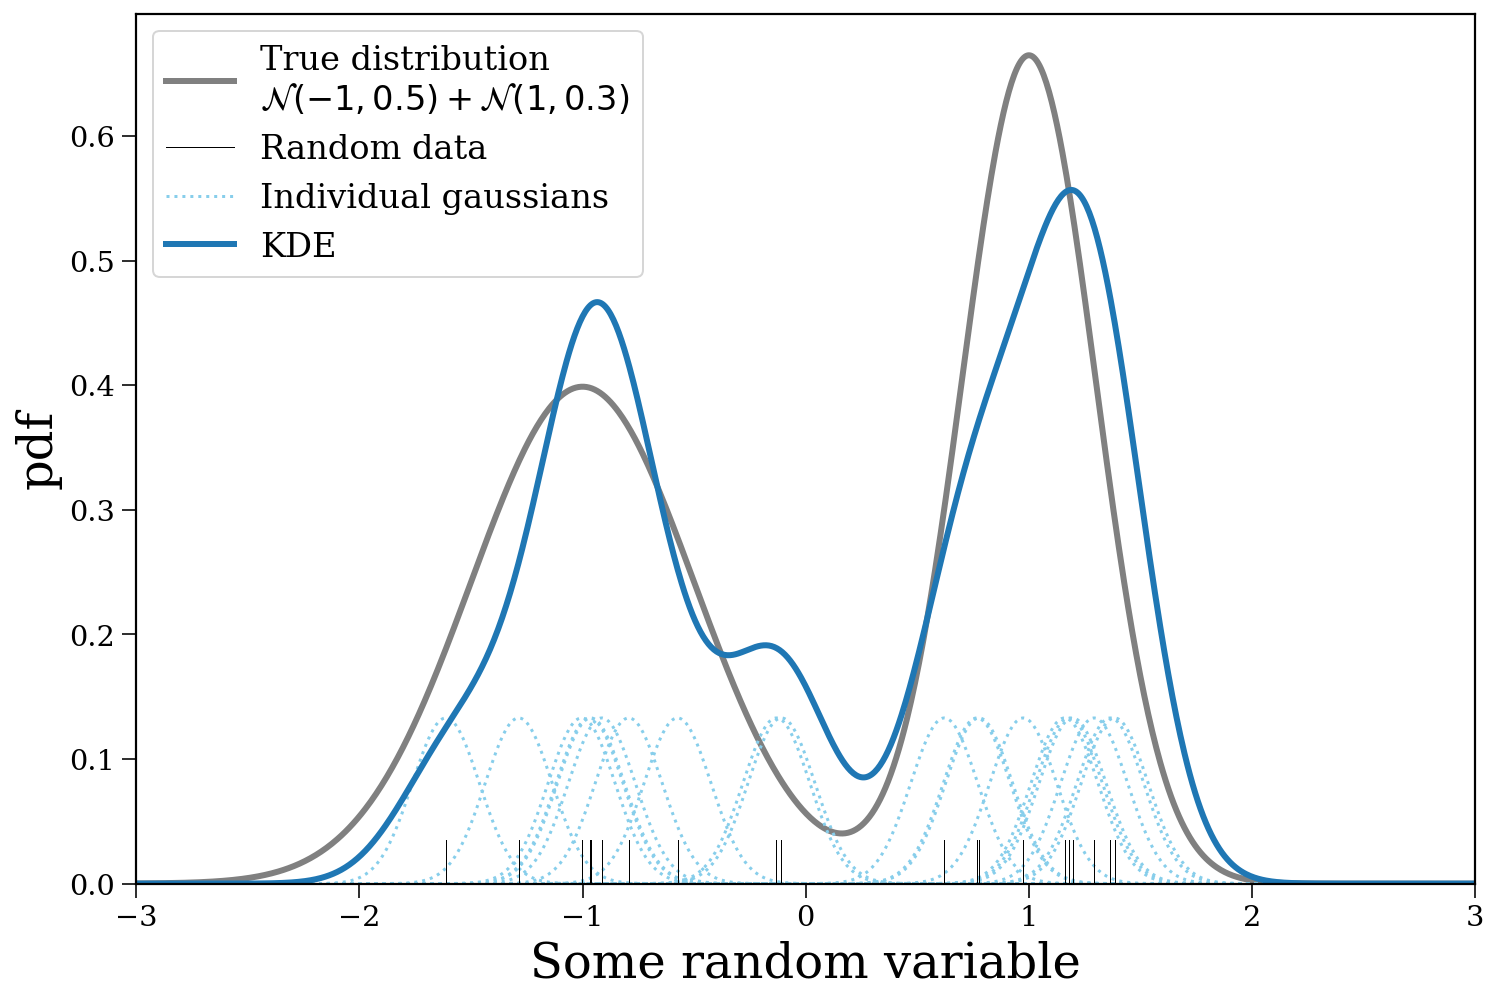

In [519]:
x_range = np.linspace(-3, 3, 1000)

fig, ax = plt.subplots()

ax.plot(x_range, 0.5 * (norm(loc=-1, scale=0.5).pdf(x_range) + norm(loc=1, scale=0.3).pdf(x_range)),
        label="True distribution\n" + r"$\mathcal{N}(-1, 0.5) + \mathcal{N}(1, 0.3)$",
        lw=3, color="grey", zorder=-1)

for i, datum in enumerate(data):
    ax.axvline(datum, 0.0, 0.05, zorder=10, color="black", lw=0.5, label="Random data" if i == 0 else "")
    ax.plot(x_range, norm(datum, scale=0.15).pdf(x_range) * 0.05, linestyle="dotted", color="skyblue",
            label="Individual gaussians" if i == 0 else "")

ax.plot(x_range, kde(x_range), color="tab:blue", lw=3, label="KDE")
    
ax.set_xlim(-3, 3)
ax.set_ylim(bottom=0)
ax.set_xlabel("Some random variable")
ax.set_ylabel("pdf")

ax.legend(fontsize=0.7*fs)

plt.show()

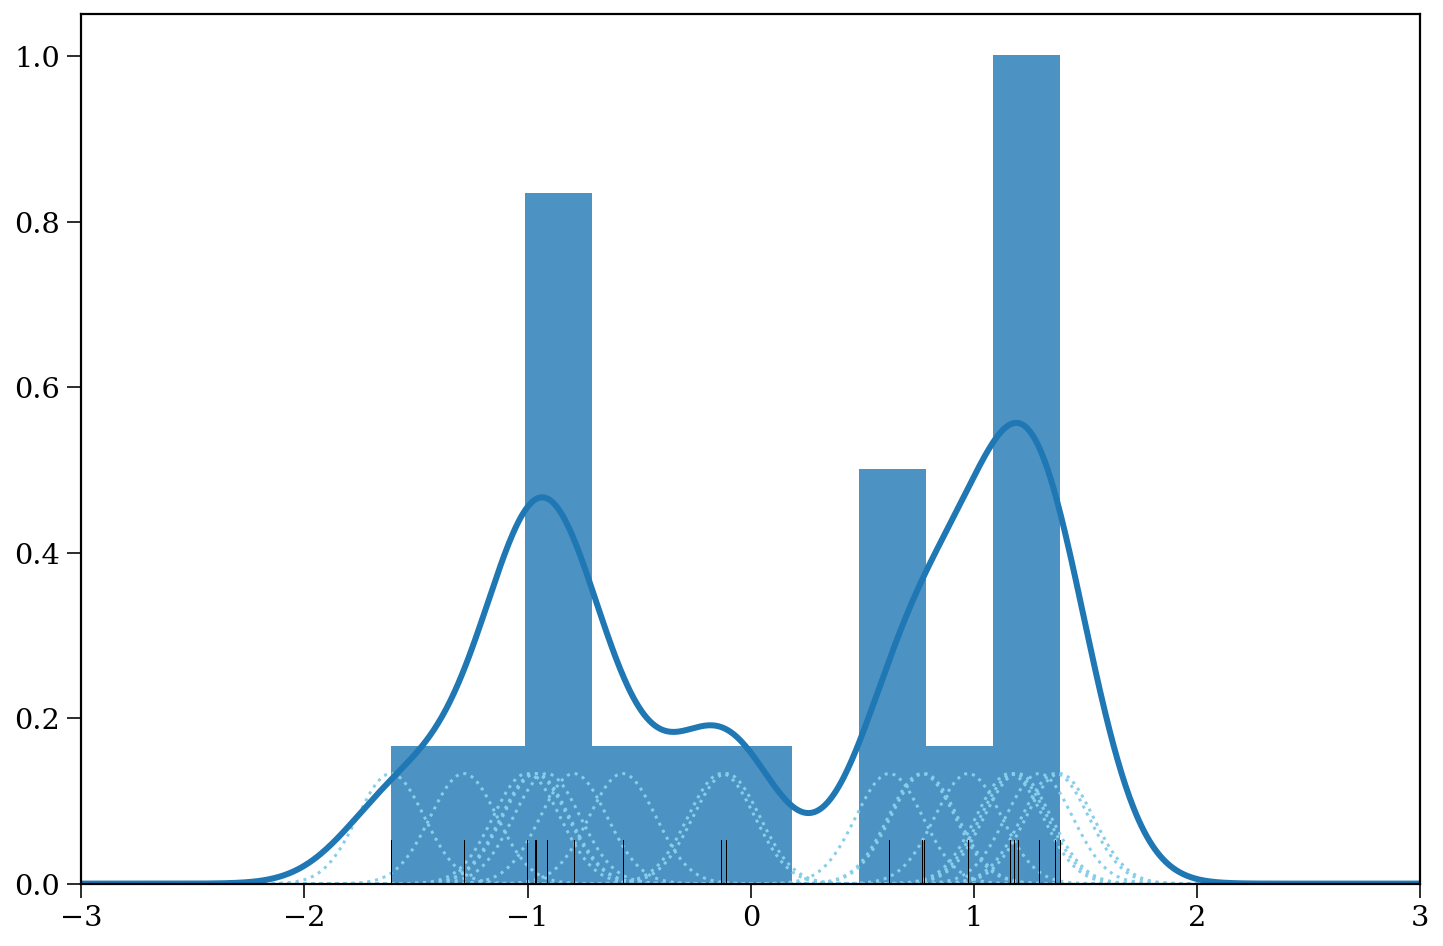

In [449]:
x_range = np.linspace(-3, 3, 1000)

fig, ax = plt.subplots()

for datum in data:
    plt.axvline(datum, -0.05, 0.05, zorder=10, color="black", lw=0.5)
    plt.plot(x_range, norm(datum, scale=0.15).pdf(x_range) * 0.05, linestyle="dotted", color="skyblue")

plt.plot(x_range, kde(x_range), color="tab:blue", lw=3)
plt.hist(data, density=True, color="tab:blue", alpha=0.8)

ax.set_xlim(-3, 3)

plt.show()